In [48]:
%pip install plotly openpyxl nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.


In [49]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

We will be loading data from an Excel file we renamed to "crops.xlsx" for ease of use, loading the data will be done using the Pandas library. We specify the sheet name as "CropStats" to read data from that specific sheet, as we felt like it held all the useful data. After loading the data, we display the first 10 rows of the DataFrame to get an initial look at the dataset, which allows us to quickly examine the structure and content of the dataset. It's essential for understanding the data before performing further analysis or preprocessing.

In [50]:
#loading our file
df = pd.read_excel("../files/crops.xlsx", sheet_name="CropStats")

#reading and displaying the first 10 rows
print("First 10 rows:")
df.head(10)


First 10 rows:


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.37,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.36,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.35,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.18,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.37,NaN,NaN


Now, we are reading and displaying the last 10 rows of the DataFrame loaded from the "crops.xlsx" Excel file, specifically from the "CropStats" sheet.

This action provides insight into the end of the dataset, helping to ensure that we have a complete view of the data. Examining the last rows can be useful to check for any patterns or anomalies that might not be evident when looking at only the first rows.

In [51]:
#reading and displaying the last 10 rows
print("Last 10 rows:")
df.tail(10)

Last 10 rows:


,Unnamed: 0,Harvest_year,admin0,admin1,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
36697,36697,2008,China,zhejiang,wheat,54340.0,212100.0,2008,3.903202,NaN,NaN
36698,36698,2009,China,zhejiang,wheat,60370.0,232400.0,2009,3.849594,NaN,NaN
36699,36699,2010,China,zhejiang,wheat,66170.0,246800.0,2010,3.729787,NaN,NaN
36700,36700,2011,China,zhejiang,wheat,72630.0,270200.0,2011,3.720226,NaN,NaN
36701,36701,2012,China,zhejiang,wheat,74490.0,271000.0,2012,3.638072,NaN,NaN
36702,36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117,NaN,NaN
36703,36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875,NaN,NaN
36704,36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027,NaN,NaN
36705,36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054,NaN,NaN
36706,36706,2017,China,zhejiang,wheat,103670.0,419200.0,2017,4.043600,NaN,NaN


We are using the info() method on the DataFrame `df` to obtain information about the columns and their data types. The output typically includes the following details for each column:

- Column Name: The name of each column in the DataFrame.
- Non-Null Count: The number of non-null (non-missing) values in each column.
- Data Type: The data type of values in each column (e.g., int64, float64, object, etc.).

This information is crucial for understanding the structure of the dataset and identifying any missing values or data type issues that may need to be addressed during data analysis and preprocessing.

We noticed that `admin2` only has null-values and `notes` has quite a lot as well. 

In [52]:
#check the columns and their dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           36707 non-null  int64  
 1   Harvest_year         36707 non-null  int64  
 2   admin0               36707 non-null  object 
 3   admin1               33716 non-null  object 
 4   crop                 36707 non-null  object 
 5   hectares (ha)        35084 non-null  float64
 6   production (tonnes)  34709 non-null  float64
 7   year                 36707 non-null  int64  
 8   yield(tonnes/ha)     34694 non-null  float64
 9   admin2               0 non-null      float64
 10  notes                5641 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.1+ MB


Lets rename these specific columns in the DataFrame. The rename method allows us to change the names of columns by providing a dictionary where the keys are the current column names, and the values are the new column names.

In [53]:
df.rename(columns={
    'admin0' : 'country',
    'admin1' : 'country_region'}, inplace=True)
df.head(10)

,Unnamed: 0,Harvest_year,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),admin2,notes
0,0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31,NaN,NaN
1,1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47,NaN,NaN
2,2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27,NaN,NaN
3,3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33,NaN,NaN
4,4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28,NaN,NaN
5,5,1907,Austria,NaN,wheat,NaN,NaN,1907,1.37,NaN,NaN
6,6,1908,Austria,NaN,wheat,NaN,NaN,1908,1.36,NaN,NaN
7,7,1909,Austria,NaN,wheat,NaN,NaN,1909,1.35,NaN,NaN
8,8,1910,Austria,NaN,wheat,NaN,NaN,1910,1.18,NaN,NaN
9,9,1911,Austria,NaN,wheat,NaN,NaN,1911,1.37,NaN,NaN


Because `admin2` only has null values we will be dropping this column.
We wont be needing the `notes` and `Unnamed: 0` columns so we drop these as well.

In [54]:
df = df.drop('admin2', axis=1)
df = df.drop('notes', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Harvest_year,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.31
1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.47
2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.27
3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.33
4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.28


This code is used to confirm that the DataFrame is now free of missing values, ensuring that the data is ready for further analysis or modeling without any data quality issues related to null values.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Harvest_year         36707 non-null  int64  
 1   country              36707 non-null  object 
 2   country_region       33716 non-null  object 
 3   crop                 36707 non-null  object 
 4   hectares (ha)        35084 non-null  float64
 5   production (tonnes)  34709 non-null  float64
 6   year                 36707 non-null  int64  
 7   yield(tonnes/ha)     34694 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 2.2+ MB


Here we defined a function, `fill_missing_yield`, to fill missing 'yield(tonnes/ha)' values based on available data. It calculates yield if 'hectares (ha)' and 'production (tonnes)' are available and 'production' is not zero. The function is applied to the DataFrame to fill missing values.

In [56]:
# Define a function to fill missing values in 'yield(tonnes/ha)'
def fill_missing_yield(row):
    yield_per_ha = row['yield(tonnes/ha)']
    if pd.isna(yield_per_ha):
        hectares = row['hectares (ha)']
        production = row['production (tonnes)']
        if pd.notna(hectares) and pd.notna(production) and production != 0:
            return hectares / production
    return yield_per_ha

# Apply the function to fill missing values in 'yield(tonnes/ha)'
df['yield(tonnes/ha)'] = df.apply(fill_missing_yield, axis=1)

To ensure that the DataFrame contains only rows with valid yield data, we removed rows with missing values in the 'yield(tonnes/ha)' column.

In [57]:
df = df.dropna(subset=['yield(tonnes/ha)'])

Here we visualize how the average crop yield changes over time in 10-year bins, providing insights into yield trends over the specified time range.

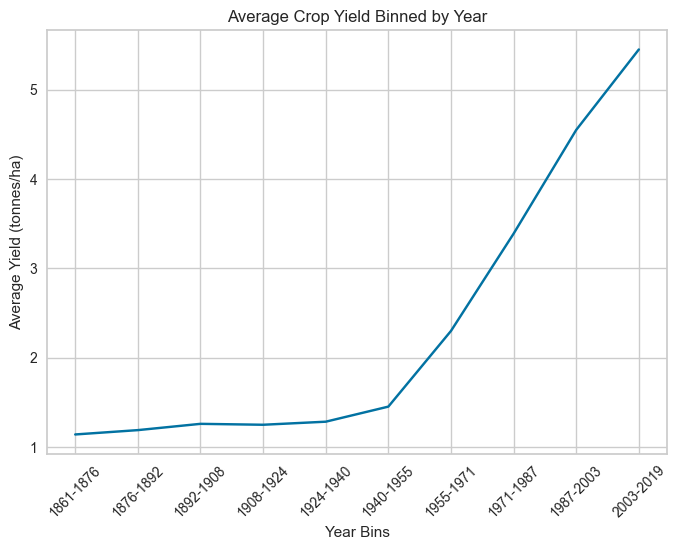

In [58]:
# Determine the minimum and maximum years for binning
min_year = df['year'].min()
max_year = df['year'].max()

# Create 10 equal bins with rounded edges
num_bins = 10
bin_width = (max_year - min_year) / num_bins
bin_edges = [min_year + i * bin_width for i in range(num_bins + 1)]

# Create the 'year_bin' column with binned values
df['year_bin'] = pd.cut(df['year'], bins=bin_edges, include_lowest=True, right=False)

# Group data by 'year_bin' and calculate the mean yield for each bin
binned_data = df.groupby('year_bin')['yield(tonnes/ha)'].mean()

# Convert the 'year_bin' labels to strings
bin_labels = [f"{int(b.left)}-{int(b.right)}" for b in binned_data.index]

# Plot the binned data
plt.plot(bin_labels, binned_data.values)

# Set labels and title
plt.xlabel('Year Bins')
plt.ylabel('Average Yield (tonnes/ha)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title('Average Crop Yield Binned by Year')

# Show the plot
plt.show()

In [59]:
# Count the number of countries before and after 1940
countries_before_1940 = df[df['year'] < 1940]['country'].nunique()
countries_after_1940 = df[df['year'] >= 1940]['country'].nunique()

print("Number of countries in the dataset before 1940:", countries_before_1940)
print("Number of countries in the dataset after 1940:", countries_after_1940)

Number of countries in the dataset before 1940: 25
Number of countries in the dataset after 1940: 25


We divide the Dataset into two distinct subsets, one for data before the year 1940 and another for data ater the year 1940.
Then we calculate the average crop yield per hectare for each country separately, for each of the subsets, we do this by grouping thedata by the country column and calculating the mean yield.
Finally, we identify the top 5 countries with the highest average crop yield per hectare for each of the two time periods.

In [60]:
# Filter data before and after 1940
df_before_1940 = df[df['year'] < 1940]
df_after_1940 = df[df['year'] >= 1940]

# Calculate the average yield for each country before and after 1940
average_yield_before_1940 = df_before_1940.groupby('country')['yield(tonnes/ha)'].mean()
average_yield_after_1940 = df_after_1940.groupby('country')['yield(tonnes/ha)'].mean()

# Get the top 5 countries with the highest average yield before and after 1940
top_5_before_1940 = average_yield_before_1940.nlargest(5)
top_5_after_1940 = average_yield_after_1940.nlargest(5)

# Print the results
print("Top 5 countries with the highest average yield per hectare before 1940:")
print(top_5_before_1940)

print("\nTop 5 countries with the highest average yield per hectare after 1940:")
print(top_5_after_1940)

Top 5 countries with the highest average yield per hectare before 1940:
country
Netherlands       2.541596
Belgium           2.513667
United Kingdom    2.354909
Canada            1.964231
Czech Republic    1.793636
Name: yield(tonnes/ha), dtype: float64

Top 5 countries with the highest average yield per hectare after 1940:
country
Belgium           5.872049
Netherlands       5.751268
United Kingdom    5.499650
France            4.933741
Chile             4.094479
Name: yield(tonnes/ha), dtype: float64


Here, we visualize and compare the top 5 countries with the highest average crop yield per hectare before and after 1940.
We calculate the maximum value for consistant scaling and create two side-by-side bar charts using Matplotlib.
The left chart shows the top 5 countries' crop yields before 1940, and the right chart displays yields after 1940.
These visualizations provide insights into changes in crop productivity over time for the top-performing countries.

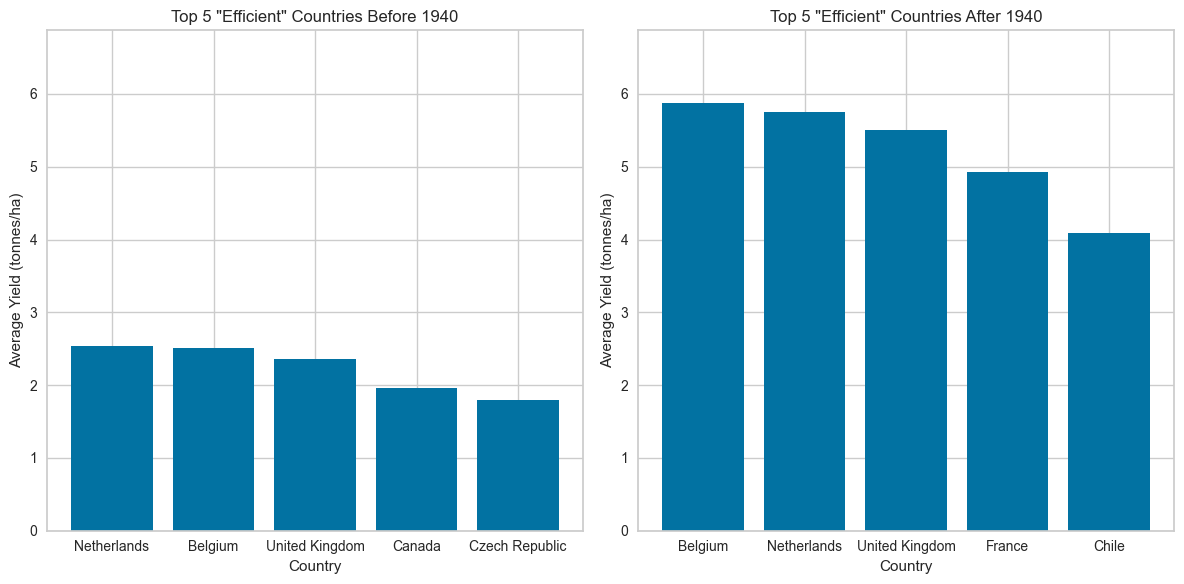

In [61]:
max_value = max(top_5_before_1940.max(), top_5_after_1940.max())

# Create bar charts to visualize the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_5_before_1940.index, top_5_before_1940)
plt.xlabel('Country')
plt.ylabel('Average Yield (tonnes/ha)')
plt.title('Top 5 "Efficient" Countries Before 1940')
plt.ylim(0, max_value + 1)  


plt.subplot(1, 2, 2)
plt.bar(top_5_after_1940.index, top_5_after_1940)
plt.xlabel('Country')
plt.ylabel('Average Yield (tonnes/ha)')
plt.title('Top 5 "Efficient" Countries After 1940')
plt.ylim(0, max_value + 1)  

plt
plt.tight_layout()
plt.show()

We generate an interactive scatter plot using Plotly Express to showcase the country with the highest crop yield each year. If offers a dynamic visualization of yield trends over time, allowing users to hover over detailed information. The plot displays the relationship between years and crop yield, whith countries color-coded for easy identification.

In [62]:
#country with the highest yield per year, hover for more info

import plotly.express as px
# Group data by 'year' and find the country with the highest yield in each year
highest_yield_per_year = df.groupby('year').apply(lambda x: x.loc[x['yield(tonnes/ha)'].idxmax()]).reset_index(drop=True)

# Create an interactive scatter plot with hover labels
fig = px.scatter(highest_yield_per_year, x='year', y='yield(tonnes/ha)', color='country', hover_name='country', labels={'country': 'Country'})
fig.update_layout(
    title='Interactive Scatter Plot of Yield Over Time',
    xaxis_title='Year',
    yaxis_title='Yield (tonnes/ha)',
)

# Set the y-axis tick values to be every year
fig.update_yaxes(tickvals=highest_yield_per_year['year'].unique())

fig.show()

In [63]:
df

,Harvest_year,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha),year_bin
0,1902,Austria,NaN,wheat,NaN,NaN,1902,1.310000,"[1892.6, 1908.4)"
1,1903,Austria,NaN,wheat,NaN,NaN,1903,1.470000,"[1892.6, 1908.4)"
2,1904,Austria,NaN,wheat,NaN,NaN,1904,1.270000,"[1892.6, 1908.4)"
3,1905,Austria,NaN,wheat,NaN,NaN,1905,1.330000,"[1892.6, 1908.4)"
4,1906,Austria,NaN,wheat,NaN,NaN,1906,1.280000,"[1892.6, 1908.4)"
...,...,...,...,...,...,...,...,...,...
36702,2013,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117,"[2003.2, 2019.0)"
36703,2014,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875,"[2003.2, 2019.0)"
36704,2015,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027,"[2003.2, 2019.0)"
36705,2016,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054,"[2003.2, 2019.0)"


Here, we define a function, `fill_average_ha`, which calculates the average 'hectares (ha)' for a specific year range and country. It checks if the 'hectares (ha)' value in a row is missing and, if so, computes the average for that country within the year range. Then, it applies this function to fill missing 'hectares (ha)' values in the DataFrame based on the calculated averages. This helps ensure that missing data is estimated based on relevant averages, improving the dataset's completeness.

In [64]:
# Define a function to calculate the average 'hectares (ha)' for a specific year range
def fill_average_ha(row):
    year = row['year']
    country = row['country']
    # left out part of the condition because some countries did not have data for it
    condition = (df['country'] == country) # & (df['year'] < 1940 if year < 1940 else df['year'] >= 1940)
    average_ha = df.loc[condition, 'hectares (ha)'].mean()
    return average_ha

# Fill missing values in 'hectares (ha)' based on the calculated averages
df['hectares (ha)'] = df.apply(lambda row: fill_average_ha(row) if pd.isna(row['hectares (ha)']) else row['hectares (ha)'], axis=1)


`fill_missing_production` is a function we made to fill missing values in the 'production (tonnes)' column by calculating it as 'hectares (ha) * yield(tonnes/ha)'. Then, we apply this function to fill missing values in the 'production (tonnes)' column of the DataFrame

In [65]:
# Define a function to fill missing values in 'production (tonnes)' with 'hectares (ha) * yield(tonnes/ha)'
def fill_missing_production(row):
    production = row['production (tonnes)']
    if pd.isna(production):
        hectares = row['hectares (ha)']
        yield_per_ha = row['yield(tonnes/ha)']
        if pd.notna(hectares) and pd.notna(yield_per_ha):
            return hectares * yield_per_ha
    return production

# Apply the function to fill missing values in 'production (tonnes)'
df['production (tonnes)'] = df.apply(fill_missing_production, axis=1)

In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34715 entries, 0 to 36706
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Harvest_year         34715 non-null  int64   
 1   country              34715 non-null  object  
 2   country_region       31834 non-null  object  
 3   crop                 34715 non-null  object  
 4   hectares (ha)        34715 non-null  float64 
 5   production (tonnes)  34715 non-null  float64 
 6   year                 34715 non-null  int64   
 7   yield(tonnes/ha)     34715 non-null  float64 
 8   year_bin             34714 non-null  category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 2.4+ MB


In [67]:
df = df.drop('year_bin', axis=1)
df = df.drop('Harvest_year', axis=1)

In [68]:
df['country_region'].fillna("Not specified", inplace=True)

df.isna().any()


country                False
country_region         False
crop                   False
hectares (ha)          False
production (tonnes)    False
year                   False
yield(tonnes/ha)       False
dtype: bool

In [69]:
# #encode the country_region
# df['country_region'] = df['country_region'].astype('category')

# df_encoded =  enc.fit_transform(df[['country_region']])
# country_region_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['country_region']))

# df = pd.concat([df, country_region_encoded_df], axis=1)
# df = df.drop('country_region', axis=1)

In [70]:
# #encode the country
# df['country'] = df['country'].astype('category')
# enc = OneHotEncoder()

# df_encoded =  enc.fit_transform(df[['country']])
# country_encoded_df = pd.DataFrame.sparse.from_spmatrix(df_encoded, columns=enc.get_feature_names_out(['country']))

# df = pd.concat([df, country_encoded_df], axis=1)
# df = df.drop('country', axis=1)

In [71]:
# # Identify the columns to one-hot encode and the columns to keep
# columns_to_encode = ['country', 'country_region']
# columns_to_keep = [col for col in df.columns if col not in columns_to_encode]

# # Initialize the OneHotEncoder
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the selected columns
# encoded_columns = encoder.fit_transform(df[columns_to_encode])

# # Create a DataFrame from the one-hot encoded array with appropriate column names
# encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# # Concatenate the one-hot encoded DataFrame with the original DataFrame, keeping the columns to keep
# df_encoded = pd.concat([df[columns_to_keep], encoded_columns_df], axis=1)
# df = df_encoded

In [72]:
# df = df.fillna(0)
df.head()

,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
0,Austria,Not specified,wheat,285197.421053,373608.621579,1902,1.31
1,Austria,Not specified,wheat,285197.421053,419240.208947,1903,1.47
2,Austria,Not specified,wheat,285197.421053,362200.724737,1904,1.27
3,Austria,Not specified,wheat,285197.421053,379312.570000,1905,1.33
4,Austria,Not specified,wheat,285197.421053,365052.698947,1906,1.28


In [73]:
df.tail()

,country,country_region,crop,hectares (ha),production (tonnes),year,yield(tonnes/ha)
36702,China,zhejiang,wheat,75520.0,278300.0,2013,3.685117
36703,China,zhejiang,wheat,82120.0,309500.0,2014,3.768875
36704,China,zhejiang,wheat,89800.0,351300.0,2015,3.912027
36705,China,zhejiang,wheat,76590.0,253900.0,2016,3.315054
36706,China,zhejiang,wheat,103670.0,419200.0,2017,4.043600


In [74]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34715 entries, 0 to 36706
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              34715 non-null  object 
 1   country_region       34715 non-null  object 
 2   crop                 34715 non-null  object 
 3   hectares (ha)        34715 non-null  float64
 4   production (tonnes)  34715 non-null  float64
 5   year                 34715 non-null  int64  
 6   yield(tonnes/ha)     34715 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.1+ MB


Here we partition the dataset into features ('X') and the target variable ('y'), excluding certain columns. Next, let's divide the data into training (80%) and testing (20%) sets to facilitate machine learning model assessment.

In [75]:
# split the data
feature_cols = df.columns.tolist()

feature_cols.remove('crop')
feature_cols.remove('country')
feature_cols.remove('country_region')
X = df[feature_cols]

y = df['crop']



print(feature_cols)
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

['hectares (ha)', 'production (tonnes)', 'year', 'yield(tonnes/ha)']


In [76]:
#verify contents of X
print(X)

       hectares (ha)  production (tonnes)  year  yield(tonnes/ha)
0      285197.421053        373608.621579  1902          1.310000
1      285197.421053        419240.208947  1903          1.470000
2      285197.421053        362200.724737  1904          1.270000
3      285197.421053        379312.570000  1905          1.330000
4      285197.421053        365052.698947  1906          1.280000
...              ...                  ...   ...               ...
36702   75520.000000        278300.000000  2013          3.685117
36703   82120.000000        309500.000000  2014          3.768875
36704   89800.000000        351300.000000  2015          3.912027
36705   76590.000000        253900.000000  2016          3.315054
36706  103670.000000        419200.000000  2017          4.043600

[34715 rows x 4 columns]


In [77]:
#verify contents of y
print(y)

0        wheat
1        wheat
2        wheat
3        wheat
4        wheat
         ...  
36702    wheat
36703    wheat
36704    wheat
36705    wheat
36706    wheat
Name: crop, Length: 34715, dtype: object


Two machine learning classifiers are defined: clf_rf, a Random Forest Classifier with 1001 estimators and a maximum of 16 leaf nodes, and clf_lr, a Logistic Regression Classifier with a maximum iteration limit of 1000. These classifiers are then trained on the training data (X_train and y_train).

In [78]:
clf_rf = RandomForestClassifier(n_estimators=1001, max_leaf_nodes=16, n_jobs=1)
clf_lr = LogisticRegression(max_iter=1000)

clf_rf = clf_rf.fit(X_train, y_train)
clf_lr = clf_lr.fit(X_train, y_train)

Here, we make predictions using the Random Forest Classifier (`clf_rf`) on the test data (`X_test`) and calculate the accuracy, which is approximately 0.609. 

Additionally, a confusion matrix is generated for the Random Forest Classifier's predictions (`rf_cm`). This matrix is displayed using `ConfusionMatrixDisplay` and visually represented. The title of the plot is "Random Forest Classifier Confusion Matrix."

rf accuracy: 0.6092467233184502


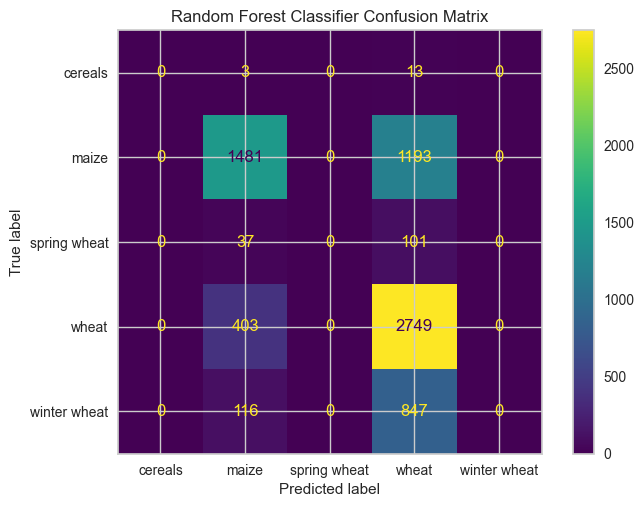

In [79]:
rf_y_pred = clf_rf.predict(X_test)

print("rf accuracy:", metrics.accuracy_score(y_test, rf_y_pred))

#random forest confusion matrix

rf_cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Random Forest Classifier Confusion Matrix")

plt.show()

In this part of the code, predictions are made using the Logistic Regression Classifier (clf_lr) on the test data (X_test). The accuracy of the model is calculated, and it is approximately 0.479.

Furthermore, a confusion matrix is created for the Logistic Regression Classifier's predictions (lr_cm). The matrix is then displayed using ConfusionMatrixDisplay and visually represented. The plot is titled "Logistic Regression Confusion Matrix."

lr accuracy: 0.4791876710355754


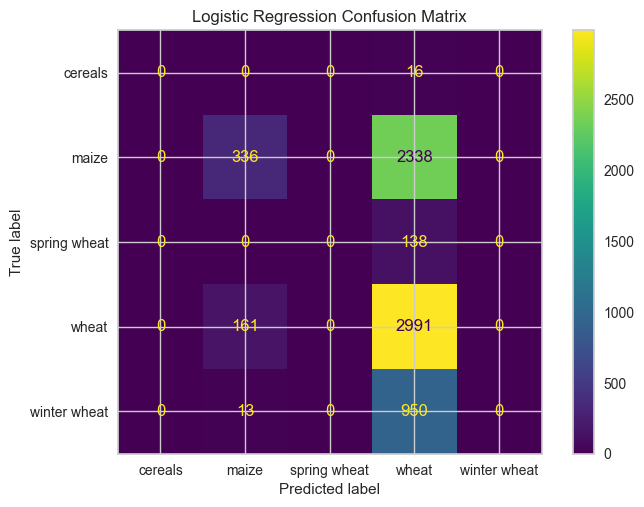

In [80]:
lr_y_pred = clf_lr.predict(X_test)

print("lr accuracy:", metrics.accuracy_score(y_test, lr_y_pred))

#lr confusion matrix

lr_cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=np.unique(y))

disp.plot()
plt.title("Logistic Regression Confusion Matrix")

plt.show()

In [81]:

# # split the data
# feature_cols2 = df.columns.tolist()
# feature_cols2.remove('country')
# feature_cols2.remove('crop')
# feature_cols2.remove('country_region')
# X = df[feature_cols2]

# y = df['country']



# print(feature_cols2)
# #Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

This code builds a machine learning regression model to predict crop yield ('yield(tonnes/ha)'). It starts by splitting the dataset into training and test sets. Categorical features ('country', 'country_region', and 'crop') are one-hot encoded, and a Random Forest Regressor is trained within a pipeline. The model's predictions are evaluated using Mean Squared Error (MSE) and R-squared (R2), yielding an MSE of approximately 0.091 and an R2 of about 0.981, indicating strong performance and a good fit to the data.

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the features and target variable
feature_cols = df.columns.tolist()
feature_cols.remove('yield(tonnes/ha)')  # Remove the target variable
X = df[feature_cols]
y = df['yield(tonnes/ha)']  # Target variable is 'production'

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['crop'])

# List of categorical features to be one-hot encoded
categorical_features = ['country','country_region','crop']

# Create a column transformer to apply one-hot encoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

# Initialize and train a Random Forest Regressor within a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)

# Make production predictions
y_pred = pipeline.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error: 0.09106655201894241
R-squared (R2): 0.9811910656818611


In [83]:
# Obtain the actual target variable values from the test dataset
y_actual = y_test  

# Print the predicted and true values as text
for actual, predicted in zip(y_actual, y_pred):
    print(f"True yield: {actual:.2f}  Predicted yield: {predicted:.2f}")


True yield: 1.38  Predicted yield: 1.40
True yield: 2.01  Predicted yield: 2.07
True yield: 1.72  Predicted yield: 1.79
True yield: 1.63  Predicted yield: 1.63
True yield: 9.27  Predicted yield: 8.81
True yield: 1.33  Predicted yield: 1.23
True yield: 11.80  Predicted yield: 11.13
True yield: 3.63  Predicted yield: 3.60
True yield: 0.92  Predicted yield: 0.94
True yield: 4.30  Predicted yield: 4.54
True yield: 2.02  Predicted yield: 1.98
True yield: 1.24  Predicted yield: 1.38
True yield: 1.31  Predicted yield: 1.35
True yield: 1.85  Predicted yield: 1.67
True yield: 6.46  Predicted yield: 6.30
True yield: 7.85  Predicted yield: 7.64
True yield: 2.20  Predicted yield: 2.27
True yield: 5.04  Predicted yield: 4.86
True yield: 1.01  Predicted yield: 0.99
True yield: 1.98  Predicted yield: 1.88
True yield: 1.32  Predicted yield: 1.28
True yield: 2.62  Predicted yield: 2.91
True yield: 1.21  Predicted yield: 1.11
True yield: 1.45  Predicted yield: 1.32
True yield: 4.92  Predicted yield: 5.2

In [84]:
from pycaret.regression import *

# Assuming 'df' is your Pandas DataFrame with the data
exp_reg = setup(data=df, target='yield(tonnes/ha)')

# Compare different regression models
best_model = compare_models()

# Fine-tune the best model
tuned_model = tune_model(best_model)

# Make predictions
predictions = predict_model(tuned_model)

# Display the final model
print(tuned_model)

,Description,Value
0,Session id,3066
1,Target,yield(tonnes/ha)
2,Target type,Regression
3,Original data shape,"(34715, 7)"
4,Transformed data shape,"(34715, 35)"
5,Transformed train set shape,"(24300, 35)"
6,Transformed test set shape,"(10415, 35)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0879,0.1010,0.3132,0.9797,0.0590,0.0251,0.0850
rf,Random Forest Regressor,0.1951,0.1296,0.3592,0.9739,0.0808,0.0856,1.3150
et,Extra Trees Regressor,0.1951,0.1333,0.3644,0.9731,0.0844,0.0909,0.7710
lightgbm,Light Gradient Boosting Machine,0.2777,0.1838,0.4282,0.9629,0.1071,0.1391,0.1040
dt,Decision Tree Regressor,0.2535,0.2294,0.4784,0.9538,0.1074,0.1083,0.0620
gbr,Gradient Boosting Regressor,0.4875,0.4916,0.7007,0.9009,0.1808,0.2633,0.4200
lr,Linear Regression,0.9013,1.4777,1.2154,0.7022,0.3123,0.5537,0.3050
ridge,Ridge Regression,0.9012,1.4777,1.2154,0.7022,0.3122,0.5536,0.0380
br,Bayesian Ridge,0.9012,1.4777,1.2154,0.7022,0.3122,0.5535,0.0480
ada,AdaBoost Regressor,1.1934,1.9311,1.3880,0.6105,0.4155,0.8962,0.3080


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0674,0.0861,0.2934,0.9824,0.0588,0.0192
1,0.0721,0.0622,0.2494,0.9879,0.0495,0.0187
2,0.0706,0.0717,0.2677,0.9859,0.0350,0.0201
3,0.0765,0.0699,0.2645,0.9864,0.0358,0.0194
4,0.0602,0.0460,0.2145,0.9900,0.0387,0.0181
5,0.0710,0.0564,0.2374,0.9887,0.0386,0.0199
6,0.0633,0.0380,0.1950,0.9921,0.0435,0.0220
7,0.0750,0.0907,0.3011,0.9817,0.0413,0.0200
8,0.0663,0.0544,0.2332,0.9889,0.0391,0.0197


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0674,0.0693,0.2633,0.9861,0.0420,0.0187


KNeighborsRegressor(metric='manhattan', n_jobs=-1, n_neighbors=2,
                    weights='distance')
